### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
import sklearn
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression



# technical import(s)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/turtle_reviews.csv')
sales = pd.read_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/turtle_sales.csv')

In [3]:
# View the DataFrame.
reviews.head()
reviews.shape
sales.head()
sales.shape

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


(2000, 11)

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,107,Wii,2006.0,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985.0,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008.0,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009.0,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996.0,Role-Playing,Nintendo,9.24,7.29,25.72


(352, 9)

In [4]:
# Any missing values?
reviews.info()
print('-'*50)
sales.info()
print('='*50)
reviews.isnull().sum()
print('-'*50)
sales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (tot

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

--------------------------------------------------


Ranking         0
Product         0
Platform        0
Year            2
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
Global_Sales    0
dtype: int64

There are 2 missing values in the year column from the sales dataset.

In [5]:
# Explore the data.
sales[sales['Year'].isnull()]

# For the null values, filter the dataset with the same product number.
sales[(sales['Product'] == 7141) | (sales['Product'] == 948)].tail()

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
179,180,7141,PS2,NaN,Sports,Electronic Arts,3.49,0.21,4.29
257,1128,948,PC,NaN,Shooter,Activision,0.48,0.66,1.34


,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
263,1381,948,Wii,2010.0,Shooter,Activision,0.67,0.39,1.15
274,1883,7141,XB,2003.0,Sports,Electronic Arts,0.84,0.02,0.89
298,3213,948,DS,2010.0,Shooter,Activision,0.44,0.04,0.52
307,3898,7141,GC,2003.0,Sports,Electronic Arts,0.33,0.08,0.42
329,5714,7141,GBA,2003.0,Sports,Electronic Arts,0.18,0.07,0.25


Noted that the null values can be replaced by records from the same product
given that it references the same game with the same release dates.

In [6]:
# Replacing the null values.
sales.iloc[179,3] = 2003
sales.iloc[257,3] = 2010

In [7]:
# Sense checking data
sales[sales['Year'].isnull()]

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales


In [8]:
# Descriptive statistics.
reviews.describe().T
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,39.49500,13.573212,17.0,29.00,38.00,49.00,72.00
remuneration (k£),2000.0,48.07906,23.123984,12.3,30.34,47.15,63.96,112.34
spending_score (1-100),2000.0,50.00000,26.094702,1.0,32.00,50.00,73.00,99.00
loyalty_points,2000.0,1578.03200,1283.239705,25.0,772.00,1276.00,1751.25,6847.00
product,2000.0,4320.52150,3148.938839,107.0,1589.25,3624.00,6654.00,11086.00


,count,mean,std,min,25%,50%,75%,max
Ranking,352.0,1428.017045,2743.580936,1.00,88.7500,176.50,1439.750,16096.00
Product,352.0,3607.227273,2360.239834,107.00,1945.0000,3340.00,5435.750,9080.00
Year,352.0,2006.982955,6.736366,1982.00,2003.0000,2009.00,2012.000,2016.00
NA_Sales,352.0,2.515966,3.409479,0.00,0.4775,1.82,3.125,34.02
EU_Sales,352.0,1.643778,2.025752,0.00,0.3900,1.17,2.160,23.80
Global_Sales,352.0,5.334688,6.264962,0.01,1.1150,4.32,6.435,67.85


## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews.drop('language', axis=1, inplace=True)
reviews.drop('platform', axis=1, inplace=True)

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [10]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'renumeration',
                'spending_score (1-100)': 'spending_score'})

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [113]:
# Create a CSV file as output.
reviews.to_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/reviews_cleaned.csv',
               index=False)
sales.to_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/sales_cleaned.csv',
             index=False)

In [115]:
# Import new CSV file with Pandas.
reviews_cleaned = pd.read_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/reviews_cleaned.csv')
sales_cleaned = pd.read_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/sales_cleaned.csv')

# View DataFrame.
reviews_cleaned.shape
sales_cleaned.shape

(2000, 9)

(352, 9)

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**gender**|*string*|reviews|The gender of the customer.|
|**age**|*integer*|reviews|Age of the customer in years.|
|**renumeration**|*float*|reviews|Total income per customer per year in pounds.(in thousands)|
|**spending_score**|*integer*|reviews|Customer’s spending nature and behaviour score from 1 to 100.|
|**loyalty_points**|*integer*|reviews|A score based on the point value of the purchase, converting the monetary value to point value, and the point value of an action. (purchase)|
|**education**|*string*|reviews|Level of qualification that the customer obtained.|
|**language**|*string*|reviews|Language used in the review.|
|**platform**|*string*|reviews|Platform that the review was obtained from.|
|**product**|*integer*|reviews, sales|Unique code allocated to product based on the item description.|
|**review**|*string*|reviews|Online reviews submitted by customers who purchased and used the products.|
|**summary**|*string*|reviews|Summary of the customer’s review.|
|**Ranking**|*integer*|sales|World ranking of the game.|
|**Platform**|*string*|sales|Video game platform on which the video game was lanuched.|
|**Year**|*float*|sales|The year the game was first released.|
|**Genre**|*string*|sales|The genre of the video game.|
|**Publisher**|*string*|sales|The company that published the game.|
|**NA_Sales**|*float*|sales|The number of games sold in North America using pounds and displayed in millions.|
|**EU_Sales**|*float*|sales|The number of games sold in Europe using pounds and displayed in millions.|
|**Global_Sales**|*float*|sales| Total sales in the world (which is a sum of EU_sales, NA_sales and other sales) using pounds and displayed in millions.

## 5. Linear regression

### 5a) spending vs loyalty

In [117]:
# Independent variable.
X = reviews_cleaned["spending_score"]

# Dependent variable.
y = reviews_cleaned["loyalty_points"] 

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews_cleaned).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        13:23:18   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [119]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -75.0527 + 33.0617 * X

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

(0.0, 103.9)

(0.0, 7191.44955)

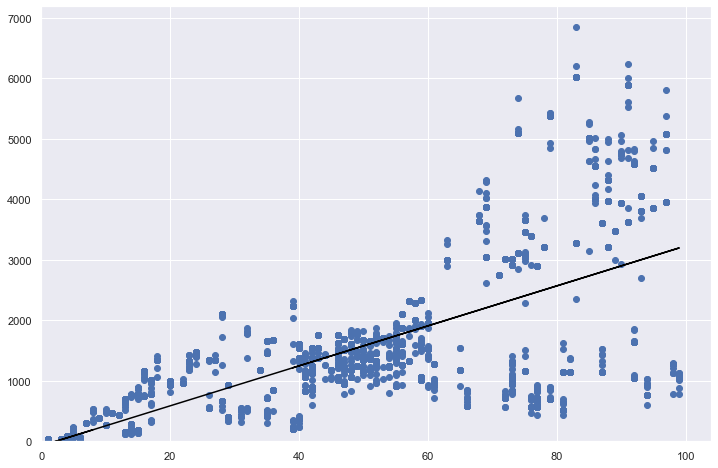

In [120]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.savefig('spending_loyalty.png')
plt.show()

### 5b) renumeration vs loyalty

In [121]:
# Independent variable.
X = reviews_cleaned["renumeration"]

# Dependent variable.
y = reviews_cleaned["loyalty_points"] 

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews_cleaned).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        13:23:25   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [123]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 65.6865 + 34.187825 * X

# View the output.
y_pred

0        486.196748
1        486.196748
2        514.230764
3        514.230764
4        542.264780
           ...     
1995    2953.190199
1996    3233.530364
1997    3233.530364
1998    3429.768480
1999    3233.530364
Name: renumeration, Length: 2000, dtype: float64

(0.0, 117.342)

(0.0, 7188.1)

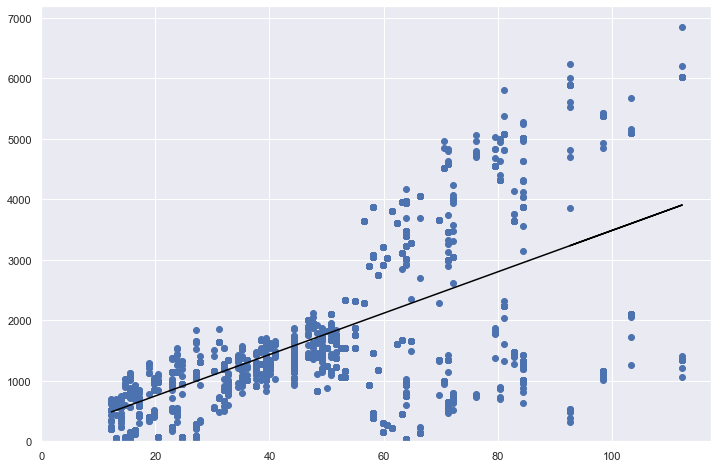

In [124]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.savefig('renumeration_loyalty.png')
plt.show()

### 5c) age vs loyalty

In [125]:
# Independent variable.
X = reviews_cleaned["age"]

# Dependent variable.
y = reviews_cleaned["loyalty_points"] 

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews_cleaned).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        13:23:27   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [127]:
# Based on the R-squared score, 0.2% of the variation in the dependent variable 
# can be explained by the independent variable.
# It is likely that age does not play a part
# in explaning the change in loyalty points.

In [128]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 1736.517739 + (-4.012805 * X)

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

(0.0, 74.75)

(0.0, 7188.1)

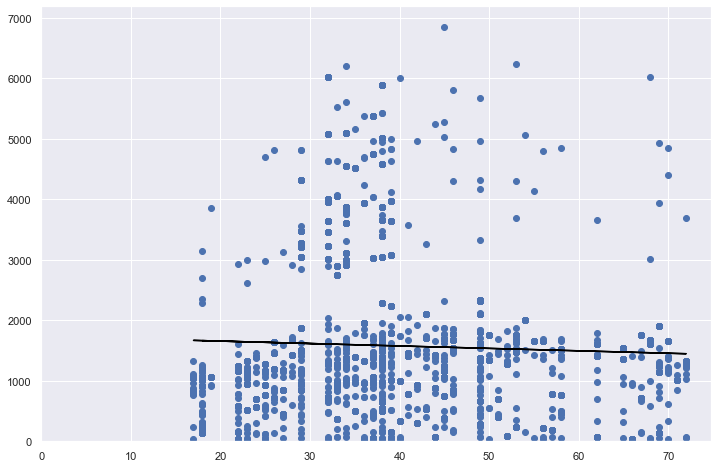

In [129]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.savefig('age_loyalty.png')
plt.show()

### 5d) age,renumeration,spending vs loyalty

In [26]:
# Independent variables.
X = reviews_cleaned[["age", "renumeration", "spending_score"]]

# Dependent variable.
y = reviews_cleaned["loyalty_points"] 

In [27]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [28]:
# Call the predictions for X (array).
multi.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [29]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8399114912748796
Intercept:  -2203.059751307901
Coefficients:


[('age', 11.060658711843354),
 ('renumeration', 34.008385492602514),
 ('spending_score', 34.183196577633645)]

In [30]:
# Based on the R-squared score, more than 83% of the variation in the dependent variable 
# can be explained by the independent variables. (age,renumeration,spending_score)

In [31]:
# Make predictions.
New_Value1 = 25.0
New_Value2 = 40
New_Value3 = 40
print ('Predicted Value: \n', multi.predict([[New_Value1 ,New_Value2, New_Value3]]))  

Predicted Value: 
 [801.1199993]


In [32]:
# Training and testing subsets with Multi linear regression.
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [33]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:54:15   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

In [34]:
print(multi.score(x_train, y_train)*100)

84.24398896169723


In [35]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [36]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [37]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

82.90723396315803


In [38]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        20.7           const
1         1.1             age
2         1.0    renumeration
3         1.1  spending_score


In [39]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [40]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 39.20687709402433, 'LM Test p-value': 1.5690518681155074e-08, 'F-stat': 13.363756098044659, 'F-test p-value': 1.2899128216952865e-08}


In [41]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 402.2350305637691
Mean Square Error (Final): 277188.7023322059


## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [42]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/reviews_cleaned.csv')

# View DataFrame.
df2.head()


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [44]:
# Drop unnecessary columns.
df2 = df2[['renumeration', 'spending_score', 'loyalty_points']]

# View DataFrame.
df2

,renumeration,spending_score,loyalty_points
0,12.30,39,210
1,12.30,81,524
2,13.12,6,40
3,13.12,77,562
4,13.94,40,366
...,...,...,...
1995,84.46,69,4031
1996,92.66,8,539
1997,92.66,91,5614
1998,98.40,16,1048


In [45]:
# Explore the data.
print(df2.columns)
df2.shape
df2.info()

Index(['renumeration', 'spending_score', 'loyalty_points'], dtype='object')


(2000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   loyalty_points  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [46]:
# Descriptive statistics.
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
renumeration,2000.0,48.07906,23.123984,12.3,30.34,47.15,63.96,112.34
spending_score,2000.0,50.00000,26.094702,1.0,32.00,50.00,73.00,99.00
loyalty_points,2000.0,1578.03200,1283.239705,25.0,772.00,1276.00,1751.25,6847.00


## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

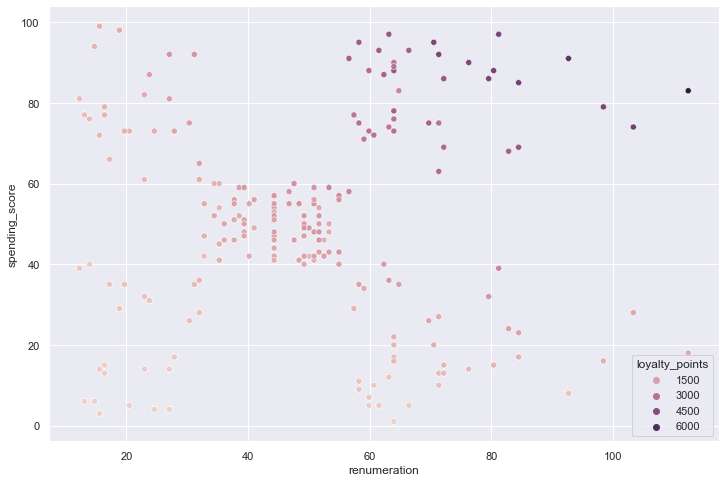

In [109]:
# Create a scatterplot with Seaborn.
sns.scatterplot( 
                x='renumeration',
                y='spending_score',
                data=df2,
                hue='loyalty_points')
plt.savefig('scat_renumeration_spending_loyalty.png')

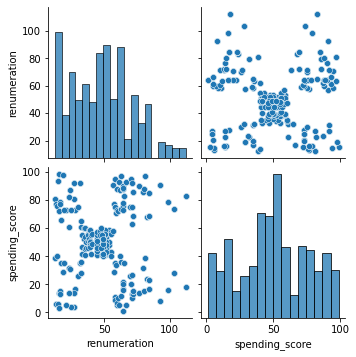

In [48]:
# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

sns.pairplot(df2, vars=x);

## 3. Elbow and silhoutte methods

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'SS distance')

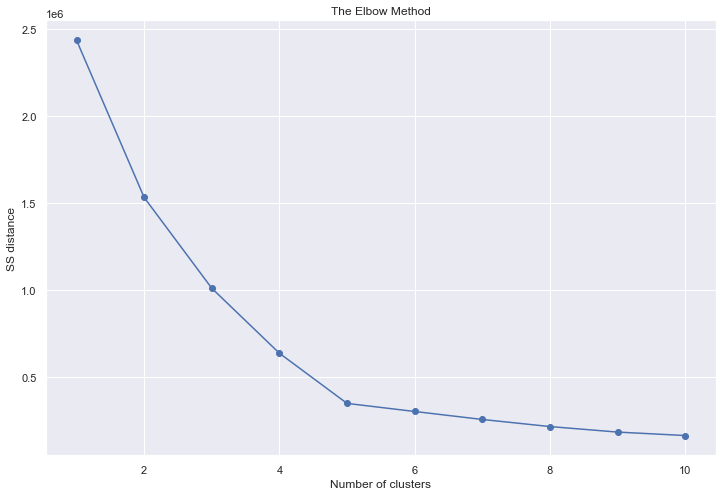

In [105]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.savefig('elbow.png')
plt.show()

Text(0.5, 1.0, 'The Silhouette Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Sil')

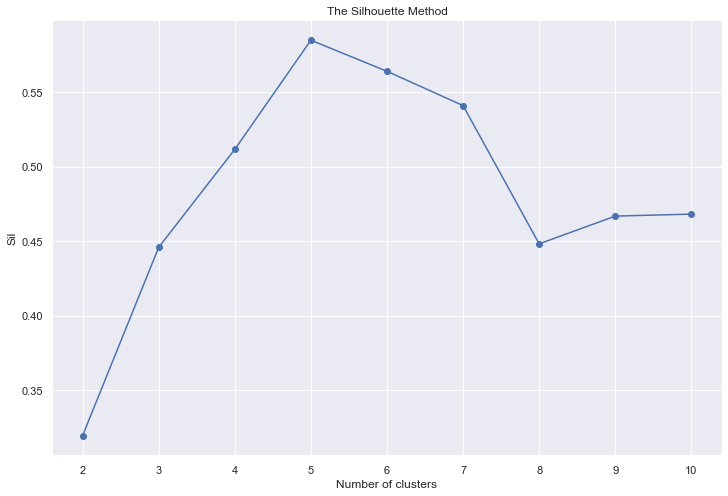

In [106]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")


plt.savefig('silhouette.png')
plt.show()

## 4. Evaluate k-means model at k=4

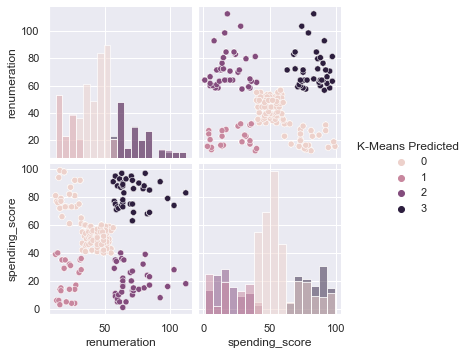

In [133]:
# Use 4 clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'hist')

In [134]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [135]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

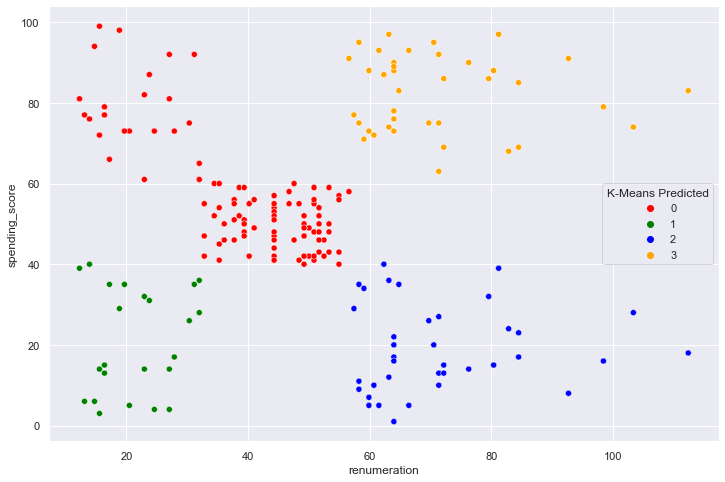

In [136]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange'])

## 5. Evaluate k-means model at k=5

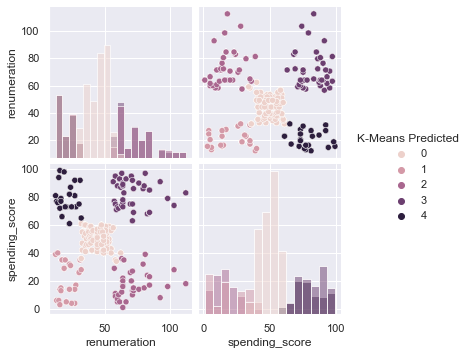

In [137]:
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'hist')

In [138]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [139]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

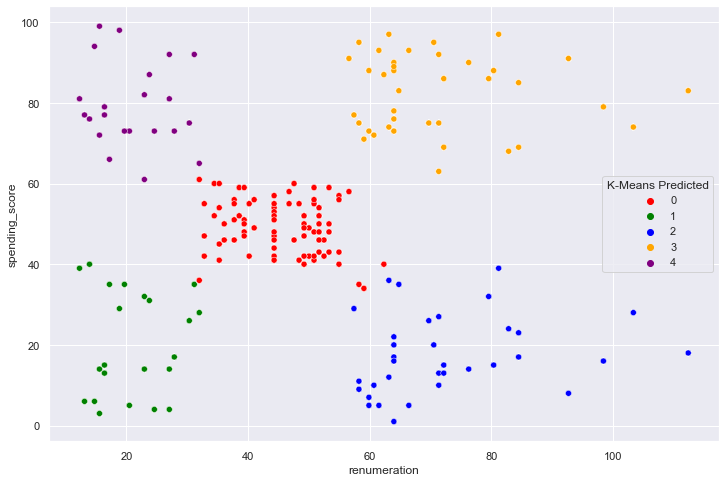

In [140]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'purple'])
plt.savefig('kmeans_5')

## 7. Discuss: Insights and observations

***Your observations here...***

Based on the above k means clustering analysis, the elbow method seems to be following a linear pattern after k=5. Also, the silhouette score is slightly higher with 5 clusters.
Visualising from the scatter plots above after evaluating the model, we also noted that the 5 cluster groups are generally distributed fairly as compared to 4 cluster groups; with 1 cluster having a higher number of observation.
The number of predicted values per class indicates a better distribution for `k=5` than `k=4`.
Hence, we will use 5 clusters for our k means model.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [59]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download ('words')
nltk.download('vader_lexicon')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/shin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /Users/shin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package words to /Users/shin/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [60]:
# Load the data set as df3.
req_cols = ['review', 'summary']
df3 = pd.read_csv('/Users/Shin/Desktop/lse_daca/course_3/LSE_DA301_assignment_files/reviews_cleaned.csv', usecols = req_cols)

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [61]:
# Explore data set.
df3[df3['review'].isnull()]
df3[df3['summary'].isnull()]

,review,summary


,review,summary


In [62]:
# df3 data has been cleaned prior to assignment 1.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [63]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [64]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [65]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3[['review']]

,review
0,when it comes to a dms screen the space on the...
1,an open letter to galeforce9 your unpainted mi...
2,nice art nice printing why two panels are fill...
3,amazing buy bought it as a gift for our new dm...
4,as my review of gf9s previous screens these we...
...,...
1995,the perfect word game for mixed ages with mom ...
1996,great game did not think i would like it when ...
1997,great game for all keeps the mind nimble
1998,fun game


In [66]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3[['summary']]

,summary
0,the fact that 50 of this space is wasted on ar...
1,another worthless dungeon masters screen from ...
2,pretty but also pretty useless
3,five stars
4,money trap
...,...
1995,the perfect word game for mixed ages with mom
1996,super fun
1997,great game
1998,four stars


### 2c) Drop duplicates in both columns

In [67]:
# Check the number of duplicate values in each column.
df3.review.duplicated().sum()
df3.summary.duplicated().sum()

50

649

In [68]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['summary'])
df3 = df3.drop_duplicates(subset=['review'])

In [69]:
# View DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1350 non-null   object
 1   summary  1350 non-null   object
dtypes: object(2)
memory usage: 31.6+ KB


## 3. Tokenise and create wordclouds

In [70]:
# Create new DataFrame (copy DataFrame).
df3_token = df3.reset_index()

# View DataFrame.
df3_token.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [71]:
# Apply tokenisation to review column.
all_review = ''
for i in range(df3_token.shape[0]):
    # Add each comment.
    all_review = all_review + df3_token['review'][i]
    
# view string
all_review

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could h

In [72]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

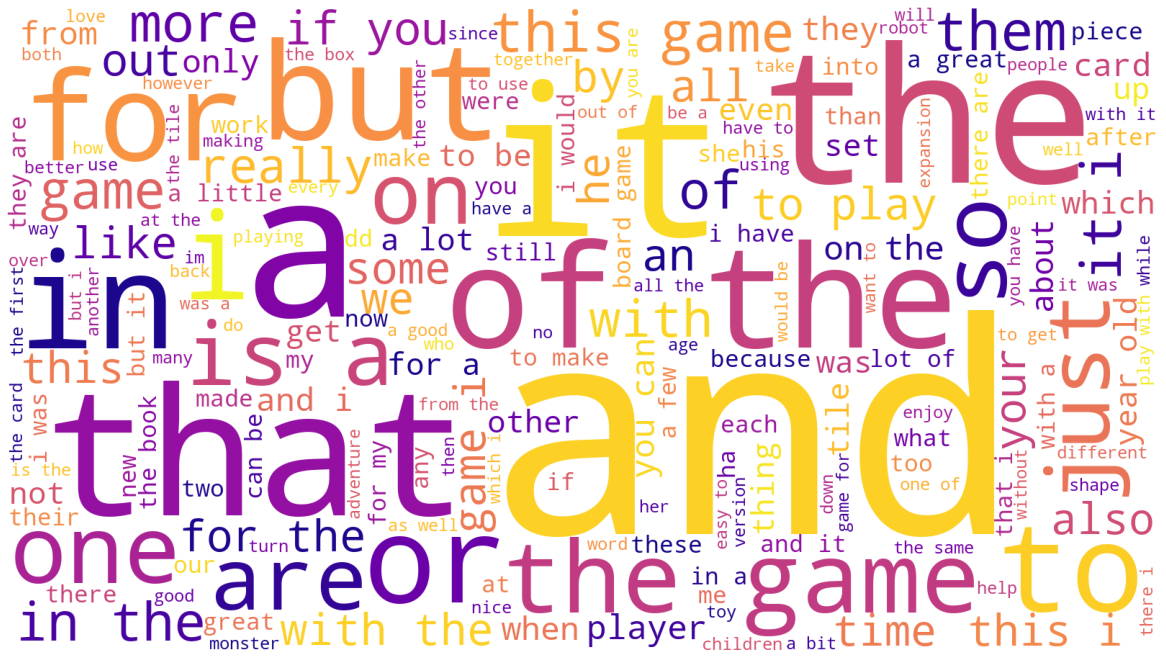

In [141]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig('wc_review.png')
plt.show()

In [74]:
# Apply tokenisation to summary column.
all_summary = ''
for i in range(df3_token.shape[0]):
    # Add each comment.
    all_summary = all_summary + df3_token['summary'][i]
    
# view string
all_summary

'the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9pretty but also pretty uselessfive starsmoney trapbest gm screen evergreat but could be even betteranother missed opportunity not a value add to the product linelove the mapnot a general dm screenvery weak gamefell completely flatgood bookbuckley was a card mommervery advanced but as good as it getsyou better know what youre getting intodont botherthe worst value ive ever seennot enough productgood product buttemporary tattoos were good gifthuge hitgorgeous pictureswonderful designswow great coloring booknice bookgreat picturesperfectwell donemy relaxationbeautiful coloring bookthe pictures are great ive done one and gave it to a great buy cant wait to work on this bookstained glass perfectionfour starsso beautifulvery nicethree starsi like every image contained in this stained glass coloring bookcreative stained glass picturesnice pictures

In [75]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

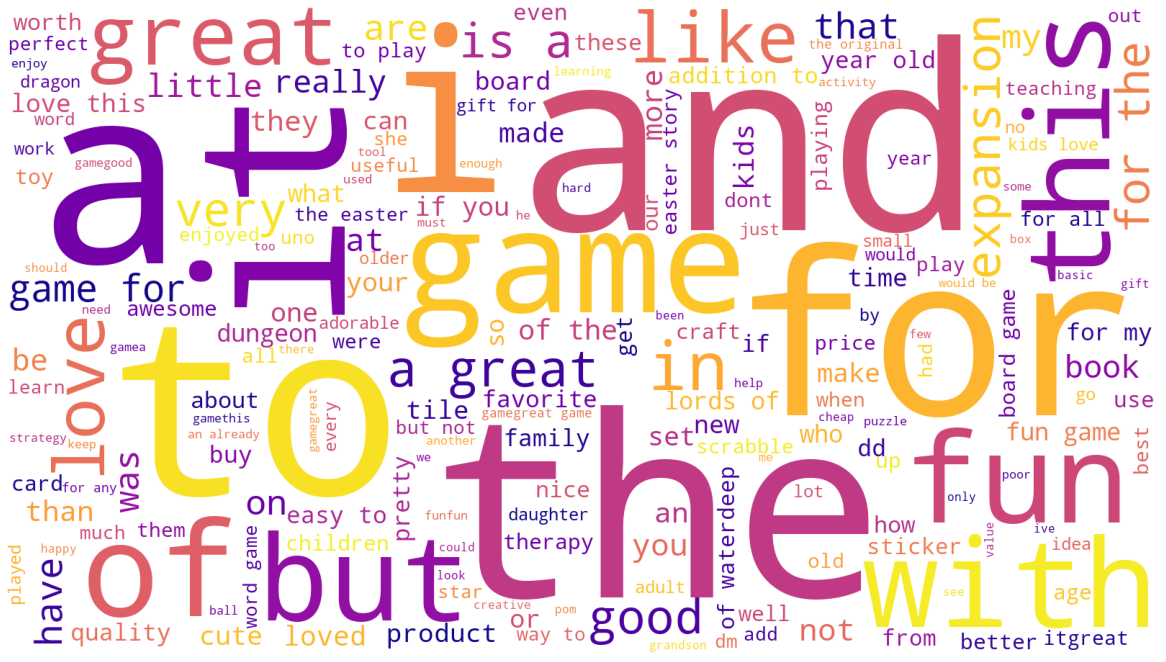

In [142]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig('wc_summary.png')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [77]:
# Determine the frequency distribution.

# Tokenise the words.
tokenised_word_review = word_tokenize(all_review)
tokenised_word_summary = word_tokenize(all_summary)



In [78]:
# Create a frequency distribution object.
freq_dist_of_words_review = FreqDist(tokenised_word_review)

# Show the five most common elements in the data set.
freq_dist_of_words_review.most_common(5)

[('the', 4938), ('and', 2934), ('to', 2843), ('a', 2796), ('of', 2259)]

In [79]:
# Create a frequency distribution object.
freq_dist_of_words_summary = FreqDist(tokenised_word_summary)

# Show the five most common elements in the data set.
freq_dist_of_words_summary.most_common(5)

[('for', 224), ('the', 222), ('to', 190), ('a', 184), ('game', 162)]

### 4b) Remove alphanumeric characters and stopwords

In [80]:
# Delete all the alpanum.
tokens_review = [word for word in tokenised_word_review if word.isalnum()]
tokens_summary = [word for word in tokenised_word_summary if word.isalnum()]

In [81]:
# Remove all the stopwords

from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens_review if x.lower() not in english_stopwords]
tokens2_summary = [x for x in tokens_summary if x.lower() not in english_stopwords]


# Define an empty string variable.
tokens2_string_review = ''

for value in tokens_review:
    # Add each filtered token word to the string.
    tokens2_string_review = tokens2_string_review + value + ' '

    

# Define an empty string variable.
tokens2_string_summary = ''

for value in tokens_summary:
    # Add each filtered token word to the string.
    tokens2_string_summary = tokens2_string_summary + value + ' '

### 4c) Create wordcloud without stopwords

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

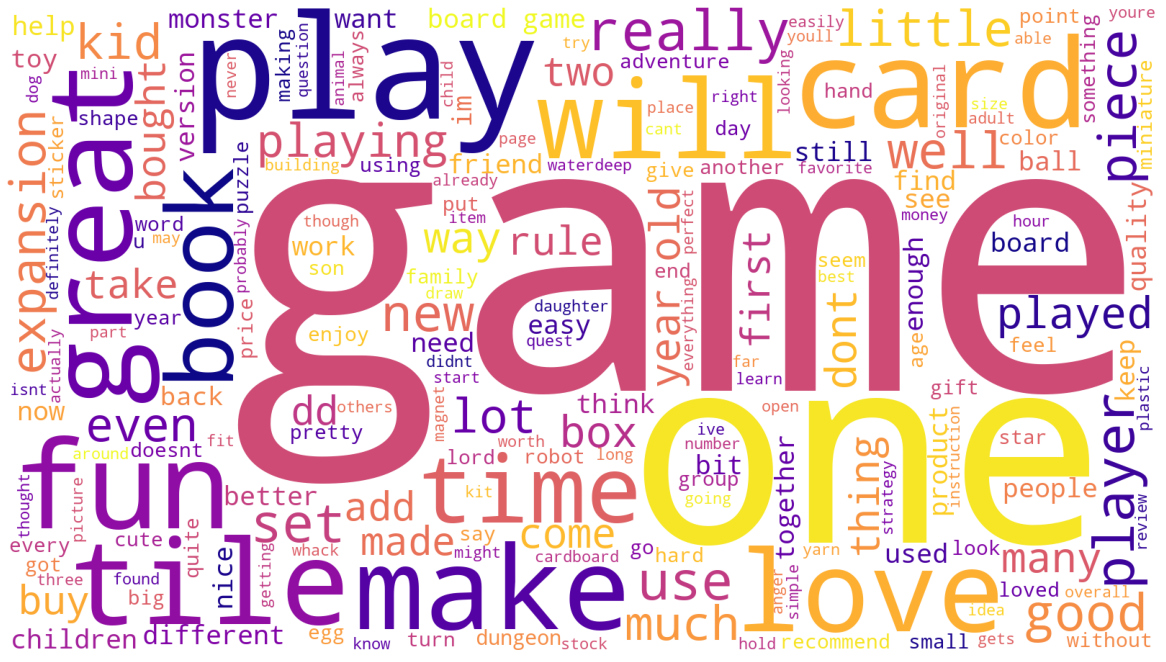

In [143]:
# Create a wordcloud without stop words for review.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string_review) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig('wc2_review.png')
plt.show()

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

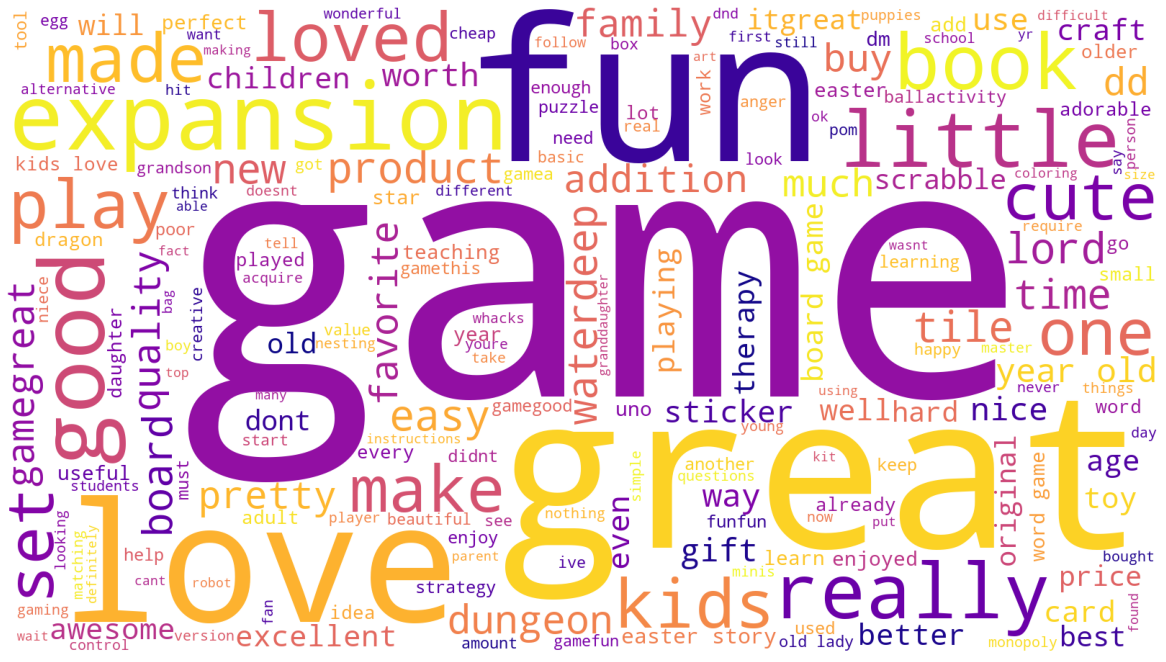

In [144]:
# Create a wordcloud without stop words for summary.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string_summary) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.savefig('wc2_summary.png')
plt.show()

### 4d) Identify 15 most common words and polarity

In [84]:
# Determine the 15 most common words for review.
# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(freq_dist_of_words_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
the,4938
and,2934
to,2843
a,2796
of,2259
it,1748
i,1669
is,1590
this,1357


Text(0.5, 0, 'Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, 'Review responses: Count of the 15 most frequent words')

Text(4938.41, -0.15, '4938')

Text(2934.41, 0.85, '2934')

Text(2843.41, 1.85, '2843')

Text(2796.41, 2.85, '2796')

Text(2259.41, 3.85, '2259')

Text(1748.41, 4.85, '1748')

Text(1669.41, 5.85, '1669')

Text(1590.41, 6.85, '1590')

Text(1357.41, 7.85, '1357')

Text(1352.41, 8.85, '1352')

Text(1303.41, 9.85, '1303')

Text(1116.41, 10.85, '1116')

Text(1078.41, 11.85, '1078')

Text(1061.41, 12.85, '1061')

Text(988.41, 13.85, '988')

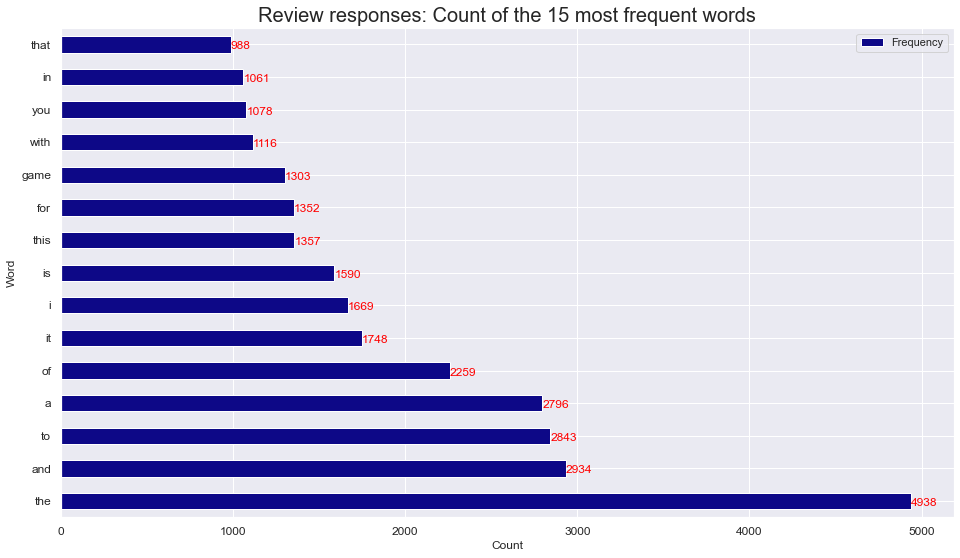

In [146]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma');

# Set the labels.
ax.set_xlabel('Count', fontsize=12);
ax.set_ylabel('Word', fontsize=12);
ax.set_title("Review responses: Count of the 15 most frequent words",
             fontsize=20);

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red');
ax.figure.savefig('review_common_words.png')

In [86]:
# Determine the 15 most common words for summary.
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(freq_dist_of_words_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
for,224
the,222
to,190
a,184
game,162
and,161
of,131
is,101
great,101


Text(0.5, 0, 'Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, 'Summary responses: Count of the 15 most frequent words')

Text(224.41, -0.15, '224')

Text(222.41, 0.85, '222')

Text(190.41, 1.85, '190')

Text(184.41, 2.85, '184')

Text(162.41, 3.85, '162')

Text(161.41, 4.85, '161')

Text(131.41, 5.85, '131')

Text(101.41, 6.85, '101')

Text(101.41, 7.85, '101')

Text(88.41, 8.85, '88')

Text(84.41, 9.85, '84')

Text(78.41, 10.85, '78')

Text(73.41, 11.85, '73')

Text(70.41, 12.85, '70')

Text(55.41, 13.85, '55')

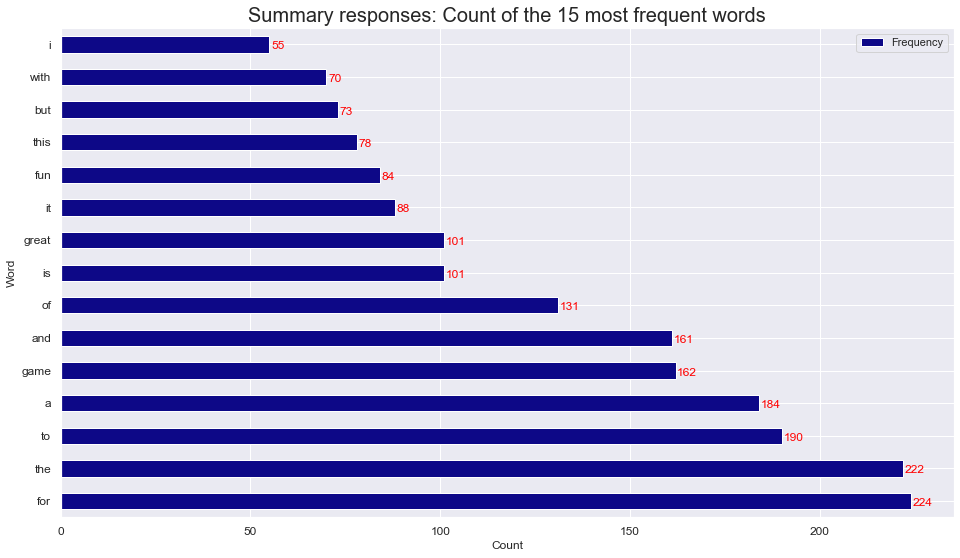

In [147]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma');

# Set the labels.
ax.set_xlabel('Count', fontsize=12);
ax.set_ylabel('Word', fontsize=12);
ax.set_title("Summary responses: Count of the 15 most frequent words",
             fontsize=20);

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red');
ax.figure.savefig('summary_common_words.png')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [88]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [89]:
# Determine polarity of both columns. 
df3['review_polarity'] = df3['review'].apply(generate_polarity)
df3['summary_polarity'] = df3['summary'].apply(generate_polarity)

# View output.
df3.head()

,review,summary,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


In [90]:
# determine subjectivity
# Provided function.
def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]


# Determine polarity of both columns. 
df3['review_subjectivity'] = df3['review'].apply(generate_subjectivity)
df3['summary_subjectivity'] = df3['summary'].apply(generate_subjectivity)

# View output.
df3.head()

,review,summary,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15,0.486111,0.500000
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80,0.442976,0.900000
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00,0.430435,0.733333
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00,0.784848,0.000000
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00,0.316667,0.000000


<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Histogram of review sentiment score polarity')

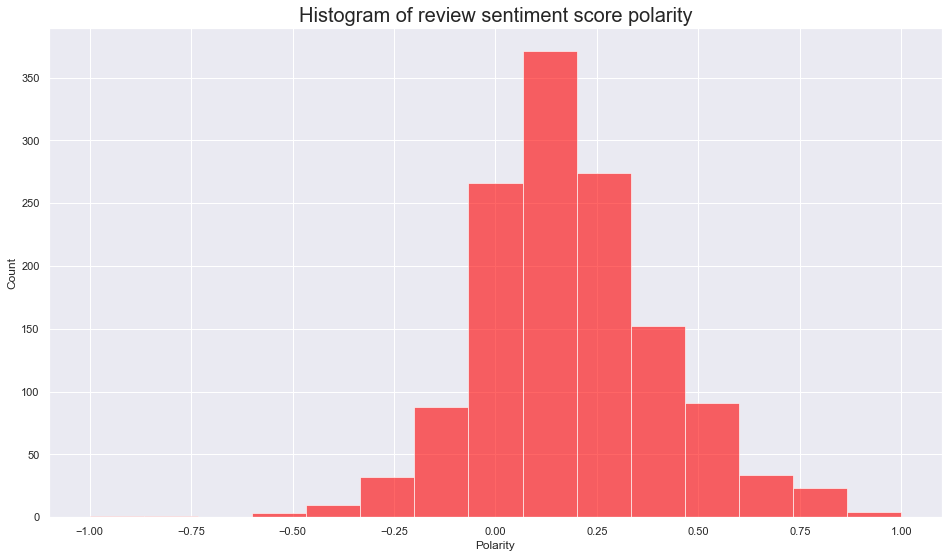

In [148]:
# Review: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)

# Histogram of sentiment score
plt.savefig('hist_review_sentiment.png')
plt.show()

This plot shows us that most comments sit closest to neutral, not expressing a particularly strong sentiment in either direction.

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Histogram of summary sentiment score polarity')

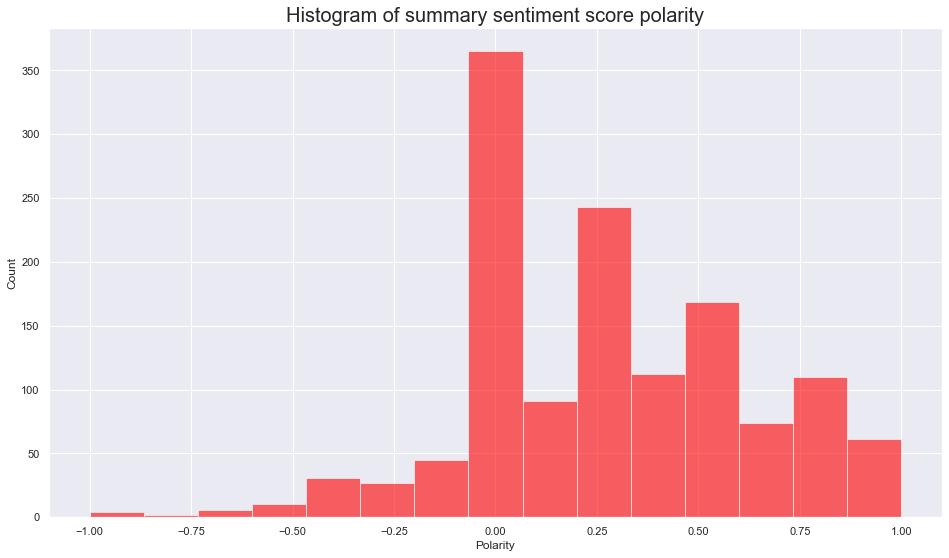

In [149]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)

# Histogram of sentiment score
plt.savefig('hist_summary_sentiment.png')
plt.show()

This plot shows us that most summary sit closest to neutral, expressing a relatively stronger sentiment in the positive direction.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [93]:
# tokenising the elements for each row of data and collate the results in different lists.
df3_review_token2 = [word_tokenize(_) for _ in df3_token['review']]
df3_summary_token2 = [word_tokenize(_) for _ in df3_token['summary']]

In [94]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
stop_words = set(stopwords.words('english'))
all_english_words = set(words.words())

In [95]:
# Pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.
df3_review_token3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df3_review_token2]
df3_summary_token3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df3_summary_token2]

In [96]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

# Run through a dictionary comprehension to take every cleaned column. 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity_review = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3_review_token3}
df_polarity_summary = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3_summary_token3}

polarity_review = pd.DataFrame(df_polarity_review).T
polarity_summary = pd.DataFrame(df_polarity_summary).T

polarity_review.head()
polarity_summary.head()

,neg,neu,pos,compound
comes screen space screen absolute premium fact space wasted art terribly informative art well completely useless reason gave technically speaking least still stand block dice ball completely,0.347,0.596,0.057,-0.8932
open letter unpainted bad spell great board however terrible still waiting single screen polluted pointless useful tables youve single use screen useful running storm thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted bloated overland map could easily reduced single panel size table short stop making crap,0.218,0.494,0.288,0.6908
nice art nice printing two filled general forgotten map beyond one blue ocean waste dont understand cant make useful rather solely specific adventure supposed able transpose adventure outside forgotten even list new would least useful map even would stuff related running game stuff related thing curse make useful raven loft undead horror general instead huge amount screen space solely castle useful small fraction time even curse adventure let alone various really kill extended use thinking potential use adventure question well use sense rage screen far useful broad dark covering lot various may suffer map one panel storm one decent tables really mark maybe ask would use,0.298,0.570,0.132,-0.9756
amazing buy bought gift new perfect,0.000,0.224,0.776,0.8860
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063


,neg,neu,pos,compound
fact space wasted art terribly informative art,0.576,0.424,0.000,-0.7783
another worthless dungeon screen,0.492,0.508,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182


In [97]:
# Top 20 negative reviews.
top20_negative_review = polarity_review.sort_values('compound', ascending=0).tail(20)

# View output.
top20_negative_review

,neg,neu,pos,compound
love product concept product simple enough young follow along especially smaller much smaller also disappointed quality book received book first time binding already coming entirely disappointing annual tradition grow though book last poor quality,0.221,0.683,0.096,-0.6697
son disappointed cheaply made one half within first couple days normal play nothing needle thread fix wing needs repair well bad wasnt made better think realize built way,0.247,0.630,0.123,-0.6711
received defective product could see egg closed inside box inspection defective wont close dealing hassle return,0.293,0.707,0.000,-0.7003
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063
fun game basically game card thoughtful get anger get angry experience anger especially good younger havent ever thought dont necessarily understand anger,0.374,0.390,0.236,-0.7436
waste money plastic whatsoever cardboard paper slide around dont lock place like real game wasnt gift would return immediately,0.314,0.686,0.000,-0.7443
never get old great toy great delivery,0.569,0.431,0.000,-0.7641
could give egg zero would poorly made hard open tender moment spent huge headache use knife open knife literally broke difficult horrible product dont buy,0.314,0.615,0.071,-0.7845
cardboard ghost original hard believe shame disgusting,0.703,0.138,0.159,-0.7845
high school math teacher cant keep ball desk school long bought last year went crazy love two make pattern choose ignore booklet comes however drop accidentally often one piece lost last year immovable object instead made difference popularity ball however b dang thing popular begun disappear year honestly think unfortunately people stealing time fiddle pocket whatever problem last year far year thanksgiving yet shrunk considered new ball like incredibly much hate encourage stealing sale however may break buy another also received parent one name ball apparently much home get one,0.248,0.594,0.158,-0.8366


In [98]:
# Top 20 negative summaries.
top20_negative_summary = polarity_summary.sort_values('compound', ascending=0).tail(20)

# View output.
top20_negative_summary

,neg,neu,pos,compound
disappointing coop game,0.615,0.385,0.000,-0.4939
disappointing,1.000,0.000,0.000,-0.4939
mad dragon,0.762,0.238,0.000,-0.4939
da bomb game,0.615,0.385,0.000,-0.4939
angry,1.000,0.000,0.000,-0.5106
really small disappointed,0.628,0.372,0.000,-0.5233
bad made paper,0.636,0.364,0.000,-0.5423
horrible nothing say would give zero,0.412,0.588,0.000,-0.5423
bad,1.000,0.000,0.000,-0.5423
amount tension tense fantasy world,0.610,0.390,0.000,-0.5719


In [151]:
# Top 20 positive reviews.
top20_positive_review = polarity_review.sort_values('compound', ascending=0).head(20)

# View output.
top20_positive_review

,neg,neu,pos,compound
kit awesome old daughter made dog first came looking exactly like picture although love great delighted result first project ever done finished product good picture first try book really straightforward show make dogs look like real breed made dogs easiest complicated book theyre great daughter pom pom pom pom tying ear use old quite involved definitely needs help really fun project together one thing glue kit actually pretty good still hold wait dry little hot glue gun made process easier probably keep dogs holding together better daughter made sleeping hold like regular stuffed made dogs kit promptly went craft store buy make bought bunch different thick yarn worked well gave different effects get get creative could easily make turkey whatever want imagine pom pom great easy nice kit variety make many dogs fun project finished product super cute love like real stuffed could make even lots room creativity keep making dogs forever craft store price get make dogs less youd pay bought similar dog store price bought store price great kit would make awesome present young girl glue kit lot fun invest hot glue gun money love kit much end spending lot craft store keep going hope much fun project,0.019,0.572,0.408,0.9987
whenever see game shelf get disturbing visual big head star trek deep space nine picture bunch game selling youd normally see wall street floor dont ask havent coffee yet morning acquire average play time note box game three six dont see two player variant one doesnt already fairly confident two imagination concerned following letter could make also came across older hill section special two feel free experiment acquire bit differently comparison could possibly make already stock whoever certain stocks colors often biggest reward occur minute version version acquire latest print game coast need get pet peeve mine way begin player tile made fairly cheap cardboard punch bend make assemble fun time trying assemble player tile tile came much better quality people may mind extra work game fairly average board game hurt much make little better also player reference tables part manual cut tear people like manual doesnt look right look torn dont see printed reference separate manual previous game much looking better quality much fact recommend trying find older printed opposed one dont mind average poor production price right pushing game mechanics game board made form grid going upper left hand corner way lower right hand corner left grid available form right reference chart find back manual acquire turns fairly simple place tile buy three stocks finally pick new tile supply correspond grid place tile onto square board grid player tile next tile sitting player form corporation doesnt become mind get free stock card player choose available grow differently cheap buy stocks early dont pay much grow size expensive buy stocks early big continue forming growing stock tile two bump real meat potatoes game happen corporation eats smaller one purple corporation example six green three purple would acquire green exception rule eleven higher size eleven considered safe player stock company acquired gains one time majority shareholder bonus amount depending big corporation actually player second stock company acquired one time minority shareholder bonus sorry prize third place unless tie second place stock company acquired choice make sell stock cash amount depending big corporation trade stock basis stock company acquired keep stock corporation form line acquired company marker put back place side board formed later end game shareholder given board stocks cash winner player money said done review three form four player game explaining wasnt bad thought would concerned whole stocks would overwhelm eleven year old ironically ended winning game randomly bought stock try everyone else ended working advantage unbeknownst stocks two middle board would made lot money one acquired ended becoming safe didnt much money lef

In [100]:
# Top 20 positive summaries.
top20_positive_summary = polarity_summary.sort_values('compound', ascending=0).head(20)

# View output.
top20_positive_summary

,neg,neu,pos,compound
wow great set great price great starter set,0.0,0.199,0.801,0.9524
easy learn great fun play,0.0,0.073,0.927,0.9136
great great creative,0.0,0.000,1.000,0.9022
great quality cute perfect toddler,0.0,0.156,0.844,0.8957
easy fun fast thoroughly enjoyable well age eight,0.0,0.254,0.746,0.8950
great game value price great also,0.0,0.221,0.779,0.8910
great game great value,0.0,0.086,0.914,0.8910
wish buy better luck fairly easy understand plenty,0.0,0.258,0.742,0.8885
fun friendly beautiful game,0.0,0.088,0.912,0.8860
useful fun expansion already awesome game,0.0,0.226,0.774,0.8834


## 7. Discuss: Insights and observations

***Your observations here...***

Comparing both sets of wordclouds, we start to see a fair bit of prominent words surfacing. Words such as game, love, great, card, tile, family, fun and player. From these words, it is likely that the the reviews and summaries were generally targeted at games that were enjoyable, foster a sense of closeness in terms family. It predominantly tells us that the games that the customer likes to play were cooperative in nature and also related to logic thinking puzzles.

Moving forward with the analysis, we will focus on finding the top 15 most common words and sentence polarity using textblob library. A horizontal barplot was used for the most frequent words.

The barplot generally agrees with the wordcloud with a few similar words used. However, noted that most of the words on the bar plots were generally neutral in nature.![image-3.png]

We now cross reference our findings with the sentence polarity; investigating the top 20 positive and negative sentences from the review and summary columns. The same dataset was re-tokenised after processing the raw data by removing stopwords, non-alphanumerics  The vadersentiment library was used for this analysis.
The results from the summary column were particularly helpful in describing the products.


From the positive sentences, It generally agrees and validate the initial findings from the word cloud. (cooperative and logic thinking puzzles)
The marketing team could use this information to move more of these game products through active promotions as it tends to be the current interest of the customers.
From the negative sentence we realise that customer would also prefer games that are instructive, cooperative and logic-thinking puzzles with great art designs. Hence, it reinforced the particular games that the customers prefers.


# 